# 羅芙奧藝術拍賣：探索式資料分析

本文件將利用 ravenel_webscrapper.py 所獲得之拍品資料，在資料整理以後，進行分析與資料可視化。

In [1]:
# 系統設定
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Data manipulation 資料整理

以下為資料清理的過程：

In [2]:
# 讀取資料
df = pd.read_csv('result.csv')

In [3]:
# 擷取估價中的最高價與最低價，並將資料形式轉換為 int

df['min_price'] = df.es_price.str.extract(r"(^\d+)").astype(int)
df['max_price'] = df.es_price.str.extract(r"(\d+$)").astype(int)

# 將成標價資料形式轉換為 int
df['fin_price'] = df.fin_price.astype(int)

In [4]:
# 新增欄位 'pass'   

Pass = []
for i in df['fin_price']:
    if i == 0: # 成標價為0即為流標
        Pass.append(0) # 拍品流標
    else:
        Pass.append(1) # 拍品成交

df['pass'] = Pass

In [5]:
# 擷取拍品創作年份中第一個資料，並新增欄位 'year_clean'  

df['year_clean'] = df['year'].str.extract(r"([^\D]\d+)").replace(np.nan, 0).astype(int)

In [6]:
# 擷取拍品名稱中的件數，並新增欄位 'piece_num'，表示拍品物件數

piece_num=[]

for piece in df['name']:
    if '件一組' not in piece:
        piece_num.append(1)
    else:
        if '兩件' in piece:
            piece_num.append(2)
        elif '三件' in piece:
            piece_num.append(3)
        elif '四件' in piece:
            piece_num.append(4)
        elif '九件' in piece:
            piece_num.append(9)
        else:
            piece_num.append(np.nan)

df['piece_num'] = piece_num

In [7]:
# 將拍品的尺寸按件數切割後，取得正確的體積總和（單位：立方公分）

df['dimention_split'] = df['dimention'].str.split(';')

size = []
for items, name in zip(df['dimention_split'], df['name']):
    dim=[]
    if '墨之風暴' in name:
        items = ['41 x 30.5', '41 x 30', '41 x 29', '41 x 29.5', '40 x 60', '40.5 x 29', '44.8 x 69.9', '45 x 35', '45 x 34.8 cm']
    for i in items:
        dim.append(re.split('x', i))
    size.append(dim)

volumn = []
for items, each, num in zip(size, df['dimention'], df['piece_num']):
    single_piece_vol = []
    for i in items:
        sing_meas_float = []
        for measures in i:
            m = re.findall(r"(\d+(?:\.\d+)?)", measures)
            sing_meas_float.append(float(m[0]))
        if '每件' in each:
            single_piece_vol.append(np.prod(sing_meas_float) * num) # 某些尺寸項目尺寸一樣僅寫件數，故將其與件數相乘
        else:
            single_piece_vol.append(np.prod(sing_meas_float)) # 預設平面作品厚度為 1 公分
    volumn.append(round(np.sum(single_piece_vol), 2))

df['volumn'] = volumn

In [8]:
# 將拍品的媒介按材料進行分類

ceremic = ['陶瓷', '美國土', '瓷器']
other = ['魔術方塊', '門片', '鑰匙', '模型屋', '籠子']
sculpture = ['玻璃纖維', '複合媒材', '木雕', '樹脂', '樟木', '樹酯']
brass = ['銅', '不鏽鋼', '鐵', '合金']
graphic = ['畫布', '版畫', '木板', '紙本', '亞麻布', '色紙', '紙', '藝術微噴', '印刷品']

med = []

for i in df['material']:
    if any(j in i for j in ceremic):
        med.append('ceremic')
    elif any(k in i for k in other):
        med.append('other')
    elif any(l in i for l in sculpture):
        med.append('sculpture')
    elif any(m in i for m in brass):
        med.append('brass')
    elif any(n in i for n in graphic):
        med.append('graphic')
    else:
        med.append('other')

df['med'] = med

In [9]:
# 檢視目前資料

df.head()

,auction,name,artist,year,material,dimention,es_price,fin_price,cover,min_price,max_price,pass,year_clean,piece_num,dimention_split,volumn,med
0,羅芙奧台北2022秋季拍賣會,熊 ; 大熊 (兩件一組),長井朋子,2018; 2020,陶瓷 拼布 26/30 ; 版畫 限量 25,10.5 (長)x 11 (寬) x 21 (高) cm ; 42 x 29.7 cm,60000-120000,120000,https://ravenel.com//resource/cover/ArtworkCov...,60000,120000,1,2018,2,"[10.5 (長)x 11 (寬) x 21 (高) cm , 42 x 29.7 cm]",3672.9,ceremic
1,羅芙奧台北2022秋季拍賣會,愛情的模樣,大槻透,2020,綜合媒材 金箔 木板,41 x 32 cm,80000-160000,96000,https://ravenel.com//resource/cover/ArtworkCov...,80000,160000,1,2020,1,[41 x 32 cm],1312.0,graphic
2,羅芙奧台北2022秋季拍賣會,樹蔭;花開 (兩件一組),飯田桐子,2020,壓克力 畫布,20 x 20 cm (每件),110000-220000,228000,https://ravenel.com//resource/cover/ArtworkCov...,110000,220000,1,2020,2,[20 x 20 cm (每件)],800.0,graphic
3,羅芙奧台北2022秋季拍賣會,我的貓咪,飯田桐子,2021,油彩 畫布,32 x 41 cm,110000-220000,264000,https://ravenel.com//resource/cover/ArtworkCov...,110000,220000,1,2021,1,[32 x 41 cm],1312.0,graphic
4,羅芙奧台北2022秋季拍賣會,冰淇淋派對,塗鴉先生,2018,壓克力 畫布,35.5 x 25.4 cm,130000-240000,216000,https://ravenel.com//resource/cover/ArtworkCov...,130000,240000,1,2018,1,[35.5 x 25.4 cm],901.7,graphic


## 資料分析與可視化 Exploratory Data Analysis

### A.) 成交與流標

首先，我希望可以討論哪些拍品參數，可能會影響交易的結果。

本次拍賣會的183件拍品中，共有128件成交，55件流標：

In [10]:
df.value_counts('pass')

pass
1    128
0     55
dtype: int64

接著，可以利用**成交**與**流標**拍品的預估價，比較拍品的估價**是否影響交易**結果：

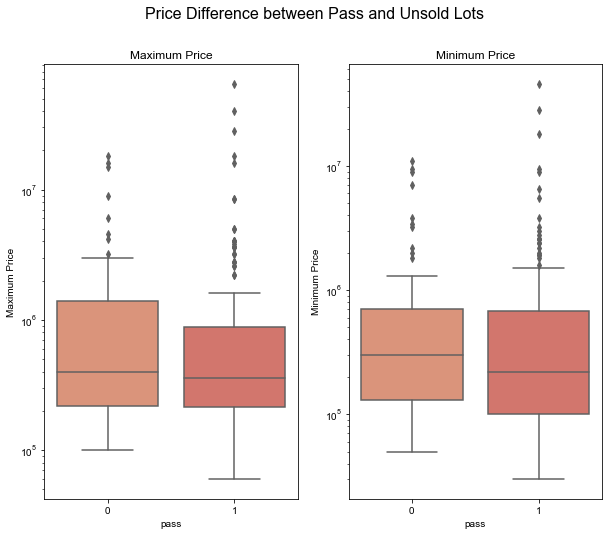

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
fig.suptitle('Price Difference between Pass and Unsold Lots',
             fontsize=16)
sns.set_style('darkgrid')
sns.set_palette('flare')

ax1 = sns.boxplot(
        data=df,
        x='pass',
        y='max_price',
        ax=axes[0]
    )
ax1.set_yscale('log')
ax1.set_ylabel('Maximum Price')
ax1.set_title('Maximum Price', fontsize=12)

ax2 = sns.boxplot(
        data=df,
        x='pass',
        y='min_price',
        ax=axes[1]
    )
ax2.set_yscale('log')
ax2.set_ylabel('Minimum Price')
ax2.set_title('Minimum Price', fontsize=12)
plt.show()

*圖一：成交與流標拍品，最高估價與最低估價比較*

由上圖的趨勢可知，價格並沒有顯著影響交易結果。

下圖則將探討拍品體積總額，對交易結果的影響。

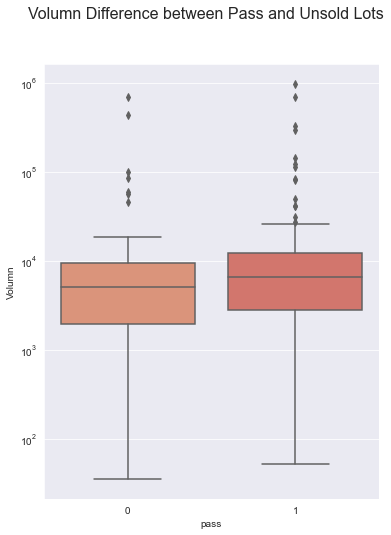

In [12]:
fig, ax = plt.subplots(1, figsize=(6, 8))
fig.suptitle('Volumn Difference between Pass and Unsold Lots',
             fontsize=16)
sns.set_style('darkgrid')
sns.set_palette('flare')

ax = sns.boxplot(
        data=df,
        x='pass',
        y='volumn',
    )
ax.set_ylabel('Volumn')
ax.set_yscale('log')


plt.show()

*圖二：成交與流標拍品體積（單位：立方公分）分佈比較*

由上圖的趨勢可知，雖然成交拍品的體積偏大，但依舊沒有顯著影響交易結果。

下圖則將探討拍品媒介（平面、雕塑等），對交易結果的影響。

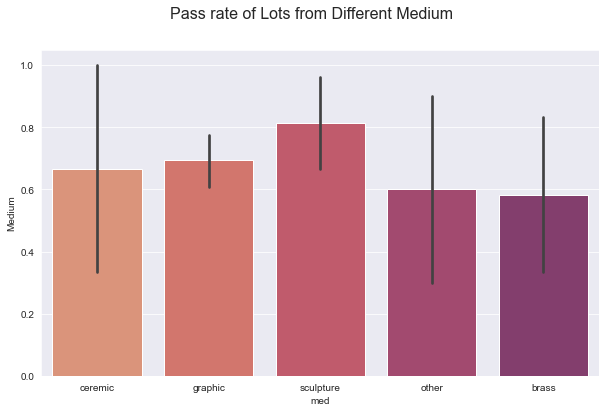

In [13]:
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Pass rate of Lots from Different Medium',
             fontsize=16)
sns.set_style('darkgrid')
sns.set_palette('flare')

ax = sns.barplot(
        data=df,
        x='med',
        y='pass',
    )
ax.set_ylabel('Medium')

plt.show()

*圖三：不同媒介間拍品成交/流標比例比較*

由上圖的趨勢可知，雕塑品的平均成交率最高，而金製品平均成交率最低

下圖則將探討拍品創作年份，對交易結果的影響。

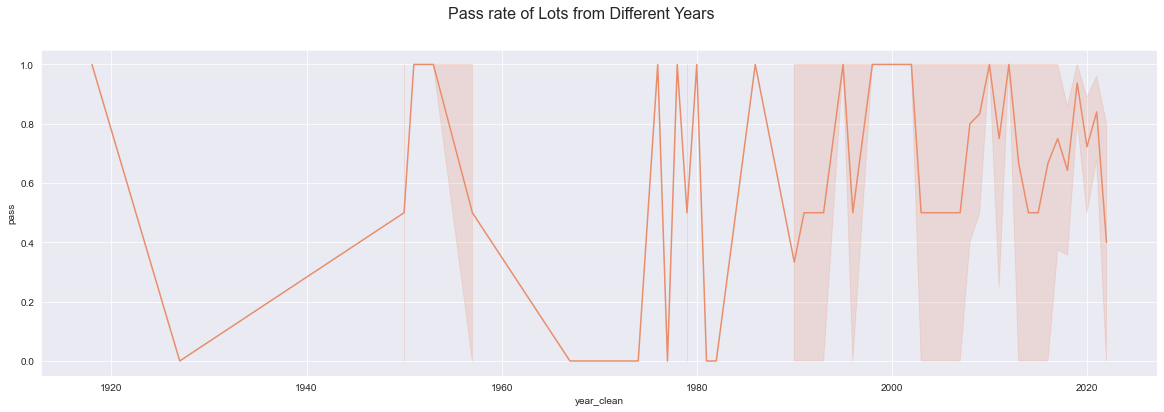

In [14]:
fig, ax = plt.subplots(1, figsize=(20, 6))
fig.suptitle('Pass rate of Lots from Different Years',
             fontsize=16)
sns.set_style('darkgrid')
sns.set_palette('flare')

ax = sns.lineplot(
        data=df[df['year_clean']>0],
        x='year_clean',
        y='pass'
        )

plt.show()

*圖四：不同拍品創作年份與成交/流標比例比較*

由上圖的趨勢可知，拍品創作年份並沒有顯著影響交易結果。

最後，我們將檢視15位拍品較多及較少，成交率較高及較低之藝術家。

In [15]:
df_pieces_count = df.groupby('artist').agg({'auction':'size', 'pass':'mean', 'fin_price': 'mean'}).rename(columns={'auction':'count','pass':'mean_pass', 'fin_price': 'mean_fin_price'}).sort_values(['count', 'mean_pass'], ascending=False)
df_pieces_count.head(15)

,count,mean_pass,mean_fin_price
artist,,,
塗鴉先生,11,0.727273,9.338182e+05
中村萌,10,0.900000,3.360000e+05
草間彌生,10,0.800000,1.900800e+06
山本麻友香,7,1.000000,8.040000e+05
奈良美智,7,0.714286,6.889714e+06
長井朋子,6,1.000000,1.108000e+06
塩田千春,6,0.833333,1.124667e+06
平子雄一,5,0.800000,5.376000e+05
朱銘,5,0.800000,5.016000e+05


In [16]:
df_pieces_count[(df_pieces_count['mean_pass']==0) & (df_pieces_count['count']==1)][['count', 'mean_pass']]

,count,mean_pass
artist,,
哈維爾．卡勒加,1,0.0
夏俊娜,1,0.0
安迪．沃荷,1,0.0
小林麻衣子,1,0.0
席時斌,1,0.0
張洹,1,0.0
張萬傳,1,0.0
朱沅芷,1,0.0
林風眠,1,0.0


由上圖表可知，拍品數量多或成交率高之15位藝術家中，有11位沒有華語姓名。
<br />而只有一項拍品，且拍品流標之19位藝術家中，共有14位擁有華語姓名。

#### 小結

1. 藝術家是否擁有華語姓名，可能會影響拍品成交結果。
2. 拍品的形式與媒介，可能會影響成交結果。

### B.) 拍品價格

接下來，我們將探討成交拍品中，各項變數與成交價格的關係。

In [17]:
#選擇成交的拍品

df_pass = df[df['pass'] == 1] 

In [18]:
# 計算成交價與估價的差異

fin_price_ratio = []

for max, min, fin in zip(df_pass['max_price'], df_pass['min_price'], df_pass['fin_price']):
    fin_price_ratio.append(((fin-min)/(max-min))*100)

df_pass['price_ratio'] = fin_price_ratio

/var/folders/9n/ncp9tc055972n60dt3xtyj2h0000gn/T/ipykernel_15637/2100060362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['price_ratio'] = fin_price_ratio


首先，我們可以觀察拍品形式與拍品價格的關係：

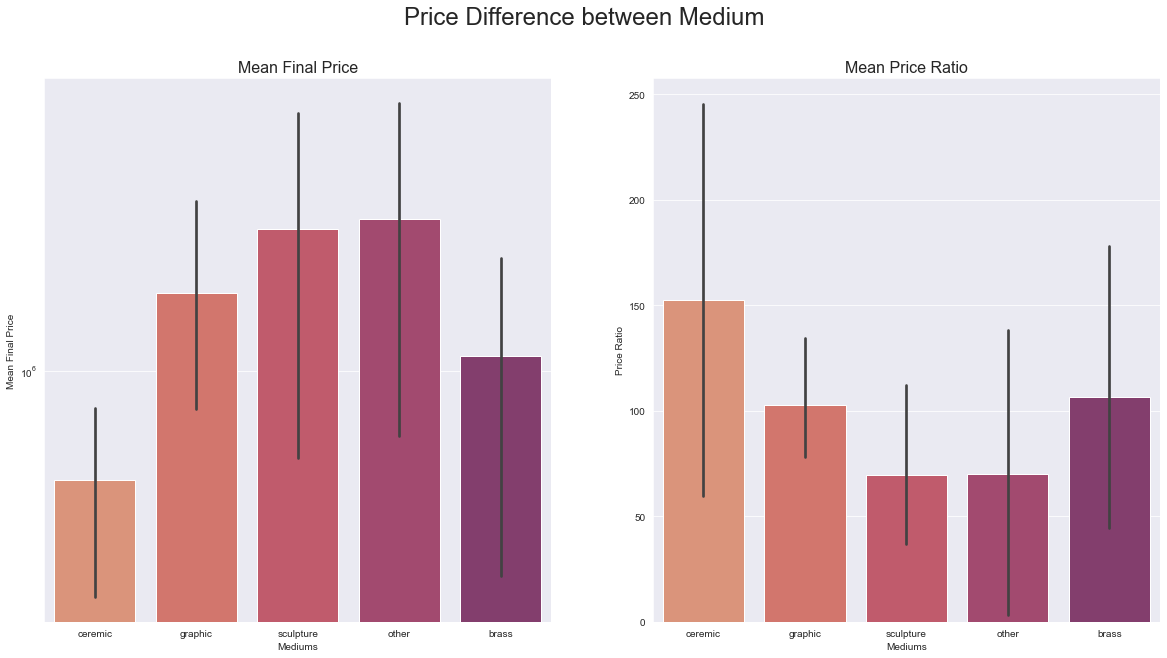

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Price Difference between Medium',
             fontsize=24)
sns.set_style('darkgrid')
sns.set_palette('flare')

ax1 = sns.barplot(
        data=df_pass,
        x='med',
        y='fin_price',
        ax=axes[0]
    )
ax1.set_xlabel('Mediums')
ax1.set_ylabel('Mean Final Price')
ax1.set_yscale('log')
ax1.set_title('Mean Final Price', fontsize=16)

ax2 = sns.barplot(
        data=df_pass,
        x='med',
        y='price_ratio',
        ax=axes[1]
    )
ax2.set_xlabel('Mediums')
ax2.set_ylabel('Price Ratio')
ax2.set_title('Mean Price Ratio', fontsize=16)

plt.show()


*圖五：拍品材質與成交價的關係，以及成交價與估價的關係* 

由上圖可知：複合材質與雕塑作品的成交價格，比起其他作品來得高，而陶瓷作品的成交價格最低。
</br>然而，陶瓷作品的成交價格比起原先估價，平均高了1.5倍，表示陶瓷作品的估價可能偏低。
</br>複合材質與雕塑作品的成交價格比起原先估價，平均低了0.7倍，代表其估價可能偏高。

下圖將探討創作年份與成交價格的關係：

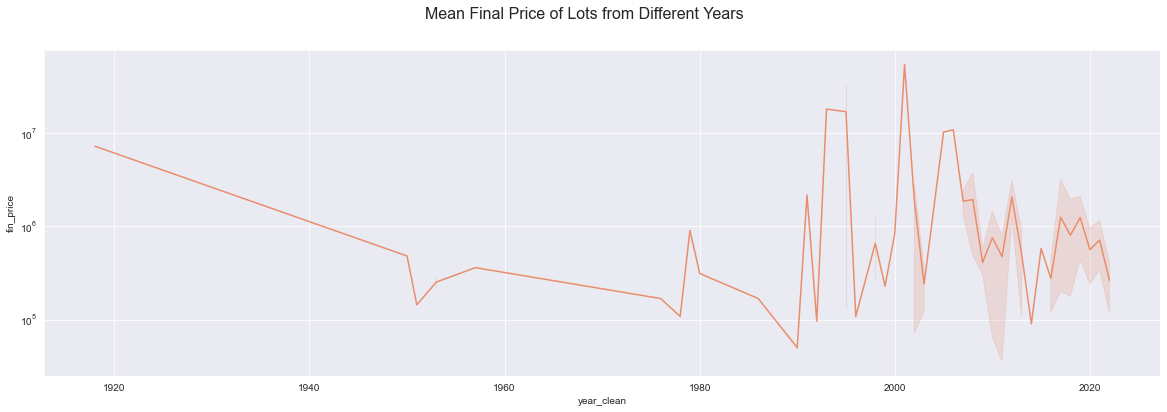

In [31]:
fig, ax = plt.subplots(1, figsize=(20, 6))
fig.suptitle('Mean Final Price of Lots from Different Years',
             fontsize=16)
sns.set_style('darkgrid')
sns.set_palette('flare')

ax = sns.lineplot(
        data=df_pass[df_pass['year_clean']>0],
        x='year_clean',
        y='fin_price'
        )
ax.set_yscale('log')


plt.show()

*圖六：拍品創作年代與成交價的關係* 

由上圖可見，除創作於1920年代之作品價格較高外，創作年代對成交價應無顯著影響。

下圖將探討拍品體積與成交價格的關係：

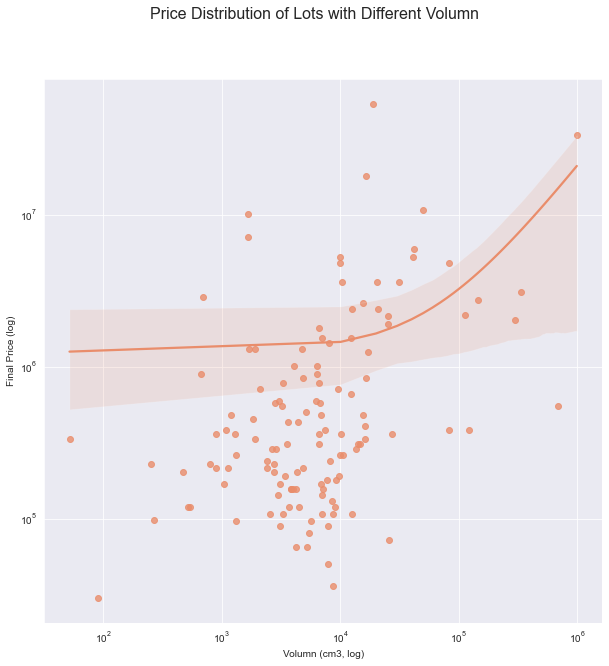

In [29]:
fig, ax = plt.subplots(1, figsize=(10, 10))
fig.suptitle('Price Distribution of Lots with Different Volumn',
             fontsize=16)
sns.set_style('darkgrid')
sns.set_palette('flare')

ax = sns.regplot(
        data=df_pass,
        x='volumn',
        y='fin_price'
        )
ax.set_xscale('log')
ax.set_xlabel('Volumn (cm3, log)')
ax.set_yscale('log')
ax.set_ylabel('Final Price (log)')


plt.show()

*圖七：拍品總體積（單位：立方公分）與成交價的關係* 

由上圖可見，多數作品體積介於1000-100000立方公分之間，
</br>當體積大於10000立方公分時，價格多高於1000000新台幣；
</br>而體積小於1000立方公分時，價格也多低於1000000新台幣。
</br>可見拍品體積有可能影響價格。

最後，我們將探討藝術家與拍品價格的關係：

In [24]:

# 製作按照藝術家分組的資料結構
df_pass_artist = df_pass.groupby('artist').agg({'auction':'size', 'fin_price':'mean', 'price_ratio': 'mean'}).rename(columns={'auction':'count','fin_price': 'mean_fin_price', 'price_ratio': 'mean_price_ratio'}).sort_values(['count', 'mean_fin_price'], ascending=False)


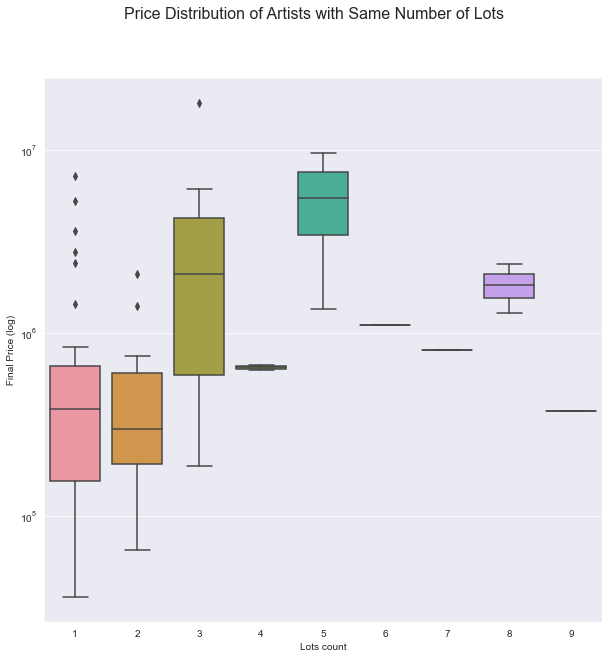

In [30]:
# 藝術家在本次拍賣會拍品數量與成交價格分佈
fig, ax = plt.subplots(1, figsize=(10, 10))
fig.suptitle('Price Distribution of Artists with Same Number of Lots',
             fontsize=16)
sns.set_style('darkgrid')
sns.set_palette('flare')

ax = sns.boxplot(
        data=df_pass_artist,
        x='count',
        y='mean_fin_price'
        )

ax.set_xlabel('Lots count')
ax.set_yscale('log')
ax.set_ylabel(' Final Price (log)')


plt.show()

*圖八：藝術家拍品數量與成交價的關係* 

由上圖可見，若是藝術家在本場拍品數在3件以上時，
</br>其價格分佈多會高於一件或兩件拍品藝術家的平均價格之第三四分位（Q3）。

再來，將拍品價格最高與數量最多的10位藝術家抽出：

In [37]:
df_pass_artist_top10 = df_pass_artist.sort_values(['mean_fin_price', 'count'], ascending=False).head(10)
df_pass_artist_top10[['mean_fin_price', 'count']]

,mean_fin_price,count
artist,,
趙無極,1.811067e+07,3
奈良美智,9.645600e+06,5
藤田嗣治,7.200000e+06,1
朱德群,6.136000e+06,3
拉法‧馬卡龍,5.280000e+06,1
山口歷,3.600000e+06,1
李真,2.760000e+06,1
王傳峰,2.400000e+06,1
草間彌生,2.376000e+06,8


可知拍品數量不一定會影響平均價格，
<br>故上一張圖的狀況可能與拍品數量並無直接關係。

此外，此處的華語系與非華語系藝術比例為6:4，亦無顯著的差異。

#### 小結

1. 拍品的形式與媒介，會影響拍品的價格
2. 估價與成交價的比例，會因拍品的形式與媒介有異
3. 拍品體積可能影響價格
4. 藝術家本次拍品數量較多時，拍品平均成交價格有異

## 結論 Conclusion



1. 藝術家是否擁有**華語姓名**，以及**拍品的形式與媒介**，可能會影響拍品的成交狀況
2. 拍品的體積、形式與媒介，以及藝術家在本次拍賣會的拍品數量，可能會影響成交價格

#### 討論

1. 更多變數

此專案搜集的資料，並不包含藝術家的生辰年、國籍、知名度等，針對藝術家更詳細的資料。如果擁有這些資料，或許可以更詳細的討論藝術家對於成交結果與價格的影響。

2. 機器學習資料調處

此專案所搜集的資料形式較無統一的結構，如形式與媒介欄位'Material'有時僅提供藝術品的創作素材，而沒有藝術品的創作形式。未來若是可以利用機器學習模組進行資料調處（如利用knn分類資料），應該可以更加顯現每一筆資料的特質。

3. 資料數目

此專案僅提供對於本次拍賣會資料的分析，但若是要運用此資料預測拍品是否成交，甚至是成交價格，只要提高資料的數量，都是可以嘗試的。若是可以蒐集到同一年份其他拍賣會的拍品資訊，增加資料量，便有機會使用機器學習方式，預測下次拍賣會，所有拍品的成交機率與價格之信心水準區間。

## 開發者名錄 Contributor

Han-wei Lee 
</br>@Hanwei_nextdoor on GitHub 
</br>hanwei.lee0414@gmail.com